In [19]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [20]:
df=pd.read_csv('tmdb_5000_movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [21]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
df[numeric_cols]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4798,220000,9367,14.269792,2040920,81.0,6.6,238
4799,9000,72766,0.642552,0,85.0,5.9,5
4800,0,231617,1.444476,0,120.0,7.0,6
4801,0,126186,0.857008,0,98.0,5.7,7


In [22]:
df = df[numeric_cols]
df.drop(columns=['id'],inplace=True)

C:\Users\H\AppData\Local\Temp\ipykernel_15168\3632150954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id'],inplace=True)


In [23]:
df.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [24]:
df=df.dropna()

In [25]:
df.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [26]:
X=df.drop(columns=['revenue'])
Y=df['revenue']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [28]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
model.fit(X_train,Y_train)
import sklearn.metrics as metrics
y_hat = model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, Y_test))

R-Squared is: 0.650858234000838


In [29]:
#linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() 
lr_model.fit(X_train, Y_train)
lr_preds = lr_model.predict(X_test)
print("R-Squared is: ", metrics.r2_score(Y_test, lr_preds))

R-Squared is:  0.713068549538294


In [30]:
df

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,6.6,238
4799,9000,0.642552,0,85.0,5.9,5
4800,0,1.444476,0,120.0,7.0,6
4801,0,0.857008,0,98.0,5.7,7


In [31]:
import math
median_budget = math.floor(df.budget.median())

In [32]:
median_budget

15000000

In [33]:
df.budget = df.budget.fillna(median_budget)
df

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,6.6,238
4799,9000,0.642552,0,85.0,5.9,5
4800,0,1.444476,0,120.0,7.0,6
4801,0,0.857008,0,98.0,5.7,7


In [34]:
median_revenue = math.floor(df.revenue.median())
median_revenue

19179969

In [35]:
df.revenue = df.revenue.fillna(median_budget)
df.head(4)

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106


In [36]:
reg = linear_model.LinearRegression()
reg.fit(df[['budget', 'popularity','runtime','vote_average','vote_count']], df.revenue)

LinearRegression()

In [37]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 -4607878.780983582
Coefficients: 
 [ 1.63183339e+00  2.48128172e+05 -2.44137871e+04 -1.53268276e+06
  6.67696104e+04]


In [38]:
y_pred = reg.predict([[2370000,145.437577, 160.4, 6.5, 2200]])
y_pred

C:\Users\H\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.6836146e+08])

In [39]:
1.63183339e+00*2370000 + 2.48128172e+05*145.437577 + 160.4*-2.44137871e+04 + -1.53268276e+06*6.5 + 2200*6.67696104e+04 + -4607878.780983582
   

168361459.9635957

C:\Users\H\AppData\Local\Temp\ipykernel_15168\1000343661.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


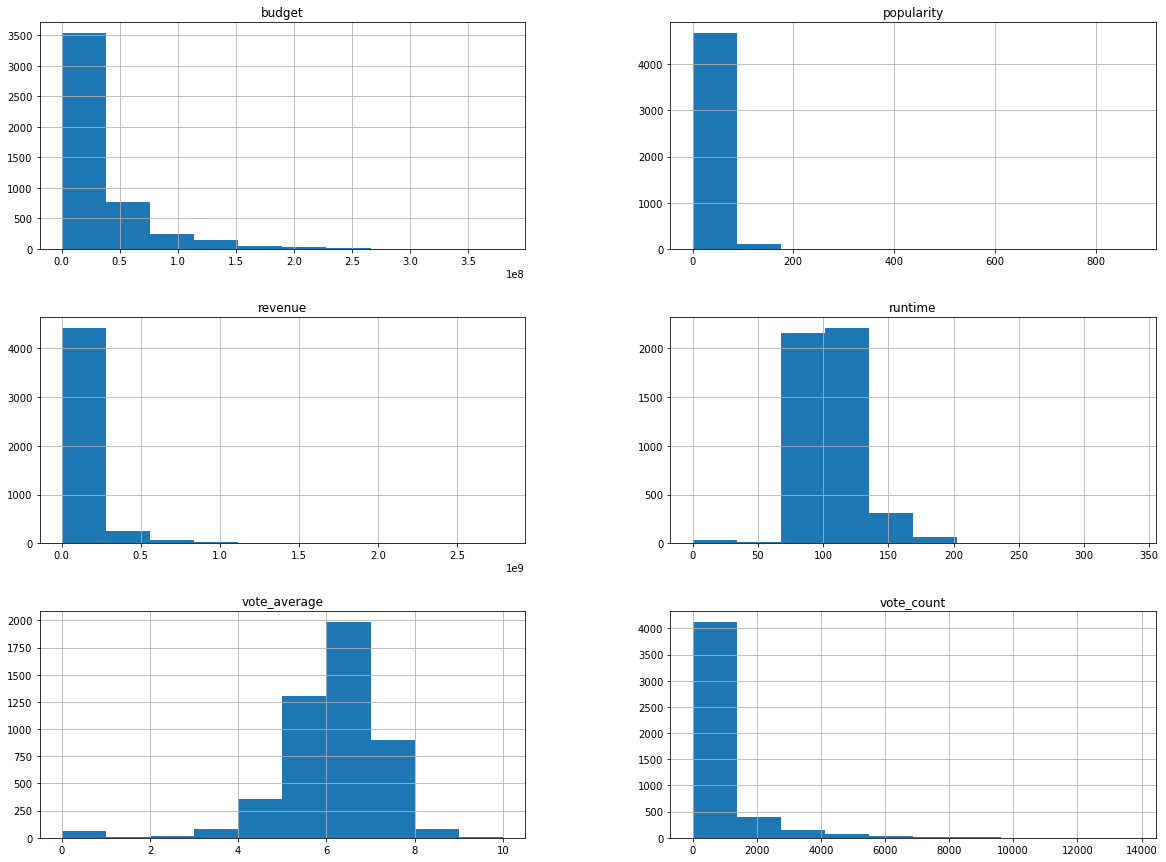

In [40]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

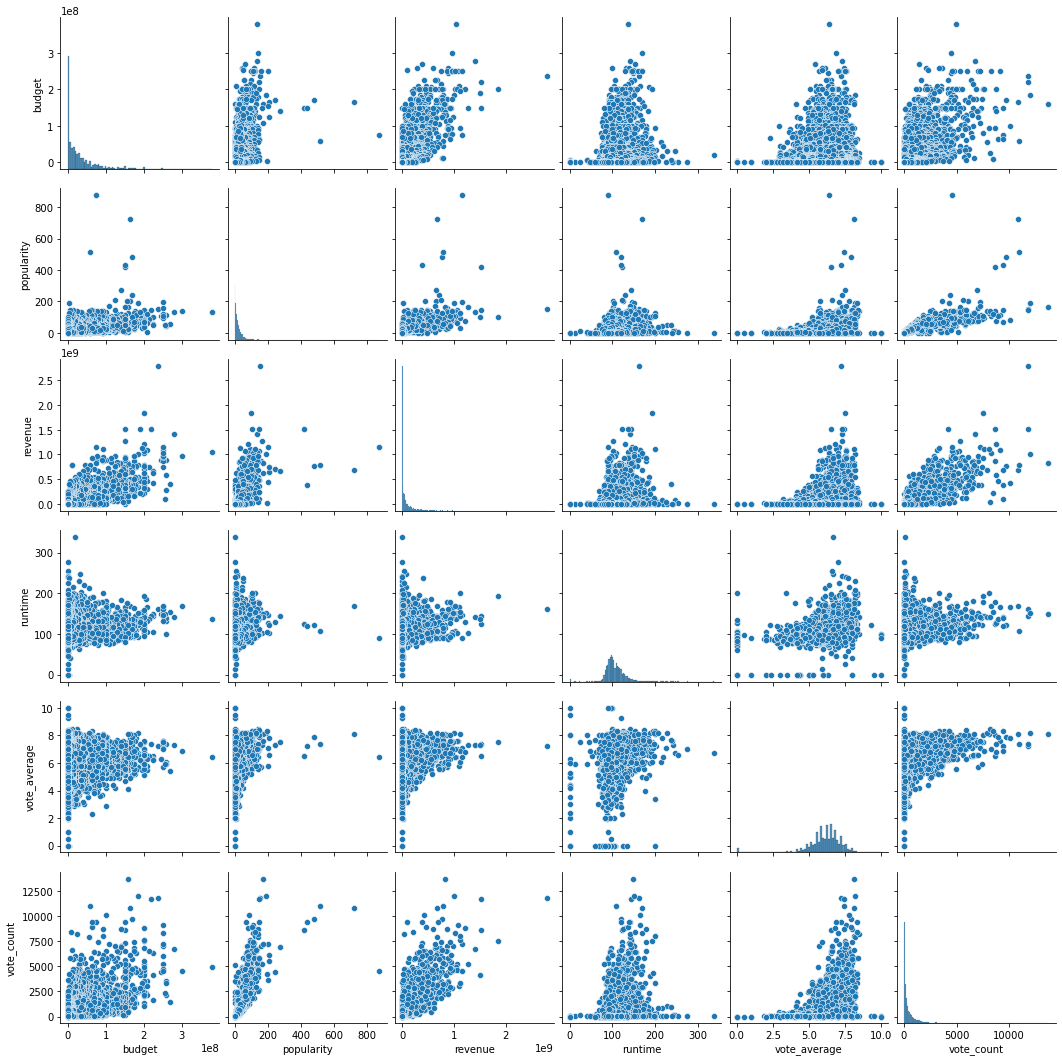

In [41]:
#Seaborn Visualization Library
import seaborn as sns
sns.pairplot(df)
plt.show()

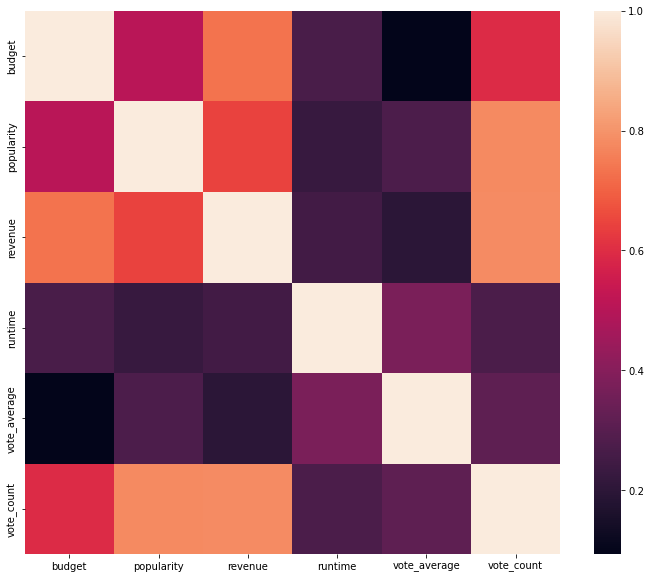

In [42]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())